# TODO
X run the model with 1GHZ channel above 67 (no GAL) using Pro devices 
X remove 2x in the code 
X 10 km maximum link 
X add clients to the relay nodes


- replace fspl with suburban from jsac



### 1GHz table for Wave Pro Base Station and Wave AP

[
  (0, 12, 3200),
  (-59, 11, 2700),
  (-61, 10, 2200),
  (-63, 9,  1950),
  (-68, 8, 830),
  (-70, 7, 550),
  (-72, 4, 300),
  (-73, 3, 260),
]


### 1 GHz Table for Wave Pro BS and Wave LR

[
  (0, 12, 1500),
  (-59, 11, 1500),
  (-62, 10, 1500),
  (-68, 8, 900),
  (-70, 7, 750),
  (-74, 3, 375),
]



### Check here for power limits at 60GHZ

https://www.etsi.org/deliver/etsi_en/303700_303799/303722/01.02.01_60/en_303722v010201p.pdf

between 13 and 30dBi  the limit is 40dBm
with 30dBi or more of GAIN you can have 55dBm

In [27]:
import math as m 
import numpy as np
import matplotlib.pyplot as plt

f_ad1=60 # GH?z
f_ad2=70 # GH?z
f_ac=5
d=np.linspace(0.1,30,100) #km#802.11ac technological values
ac_table = [
               (0, 400),
               (-72, 400),    #MCS Rx table derived by Mikrotik antbox19 datasheet (some values have been interpolated)
               (-75,360),
               (-77,300),
               (-83,270),
               (-86,240),
               (-90,180),
               (-92,120),
               (-94,90),
               (-95,60),
               (-96,30)] 
 


#802.11ad technological values   possibily 2GHZ

#802.11ad technological values
ad_table_standard = [(0, 4620),
               (-53, 4620), 
               (-54, 3850),
               (-55, 3080),
               (-59, 2502),
               (-61, 2310),
               (-62, 1925),
               (-63, 1540),
               (-64, 1155),
               (-65, 926.5),
               (-66, 770),
               (-68, 385),
               (-78, 27.5)] 


ad_table_1G_pro = [
  (0, 12, 3200),
  (-59, 11, 2700),
  (-61, 10, 2200),
  (-63, 9,  1950),
  (-68, 8, 830),
  (-70, 7, 550),
  (-72, 4, 300),
  (-74, 3, 260),
  (-75, 0, 0)
]

ad_table_1G_lite = [
  (0, 12, 1500),
  (-59, 11, 1500),
  (-62, 10, 1500),
  (-68, 8, 900),
  (-70, 7, 750),
  (-74, 3, 375),
  (-75, 0, 0)
]



def calc_ac_speed(pl, ptp=True):
    pt = 30 # (dBm) Maximum EIRP According to Italian regulations (1W)
    gr_m = 19 # (dBi) received gain for mANTBox 19
    gr_d = 27 # (dBi) received gain for LHG XL5
    if ptp:
        pr = pt + gr_d - pl
    else:
        pr = pt + gr_m - pl
    speed = 0
    for i in range(len(ac_table)):
        if pr<ac_table[i][0]:
            speed = ac_table[i][1]
    return speed


def calc_ad_speed(pl, ptp=True, pro=True):
    pt = 55 # (dBm) Maximum EIRP According to ETSI TR 102 555
    gr_m = 20 # (dBi) received gain for wave ap micro
    gr_d = 46 # (dBi) received gain for wave long range
    if pro:
        ad_table=ad_table_1G_pro
    else:
        ad_table=ad_table_1G_lite
    if ptp:
        pr = pt + gr_d - pl
    else:
        pr = pt + gr_m - pl
    speed = 0
    for i in range(len(ad_table)):
        if pr<ad_table[i][0]:
            speed = ad_table[i][2]
    return speed

In [24]:
ptmp_60 = 500
leaf_60 = 280

ptmp_5 = 200
leaf_5 = 100


(ptmp_60+leaf_60)/(ptmp_5+leaf_5)

2.6

In [25]:

FSPL = 20*np.log10(d) + 20*np.log10(f_ac) + 92.45 #positive values, pathloss
GAL = 15*d #dB/km

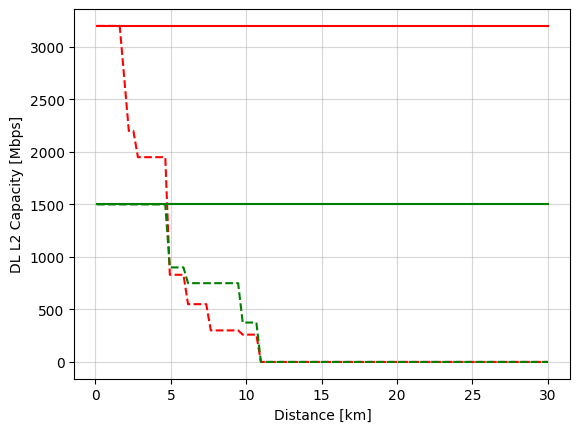

In [29]:
plt.plot(d, [calc_ad_speed(20*np.log10(di) + 20*np.log10(f_ad2) + 92.45, ptp=True) for di in d], "r-", label="70GHz PtP")
#plt.plot(d,  [calc_ac_speed(20*np.log10(di) + 20*np.log10(f_ac) + 92.45, ptp=True) for di in d],"k-", label="5GHz PtP")
plt.plot(d, [calc_ad_speed(20*np.log10(di) + 20*np.log10(f_ad2) + 92.45, ptp=False) for di in d],"r--", label="70GHz PtMP")

plt.plot(d, [calc_ad_speed(20*np.log10(di) + 20*np.log10(f_ad2) + 92.45, ptp=True, pro=False) for di in d], "g-", label="70GHz PtP Lite")
plt.plot(d, [calc_ad_speed(20*np.log10(di) + 20*np.log10(f_ad2) + 92.45, ptp=False, pro=False) for di in d], "g--", label="70GHz PtmP Lite")

#plt.plot(d,  [calc_ac_speed(20*np.log10(di) + 20*np.log10(f_ac) + 92.45, ptp=False) for di in d],"k--", label="5GHz PtMP")
#plt.plot(d, [calc_ad_speed(20*np.log10(di) + 20*np.log10(f_ad1) + 92.45 + 15*di, ptp=True) for di in d], "g-", label="60GHz PtP + GAL")

#plt.plot(d, [calc_ad_speed(20*np.log10(di) + 20*np.log10(65) + 92.45+ 3.9*di, ptp=True) for di in d], "y-", label="65GHz PtP")
#plt.plot(d, [calc_ad_speed(20*np.log10(di) + 20*np.log10(66) + 92.45+ 1.9*di, ptp=True) for di in d], "y+", label="66GHz PtP")

plt.ylabel("DL L2 Capacity [Mbps]")
plt.xlabel("Distance [km]")
#plt.legend()
plt.grid(alpha=0.5)


(0.0, 20.0)

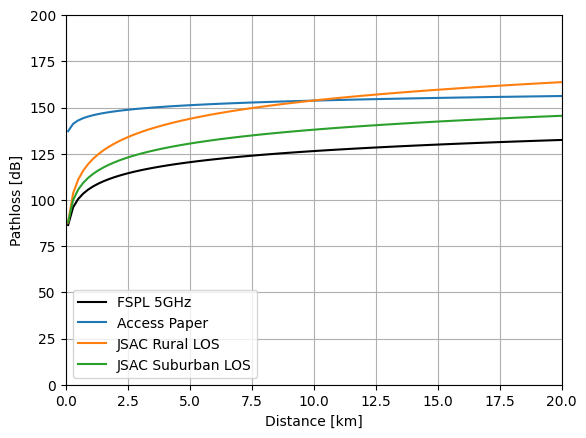

In [20]:
# plt.plot(d, 20*np.log10(d) + 20*np.log10(f_ad2) + 92.45, "r", label="70GHz")
# plt.plot(d, 20*np.log10(d) + 20*np.log10(f_ad1) + 92.45 + 15*d, "g" ,label="60GHz")
plt.plot(d, 20*np.log10(d) + 20*np.log10(f_ac) + 92.45, "k", label="FSPL 5GHz")

pl = 138 + np.log10(f_ac) + 2.26*np.log10(d*1000) -2*np.log10(10) -16*np.log10(10) +6*np.log10(10)*np.log10(d*1000)
plt.plot(d, pl, label="Access Paper")

pl = 21.8 + 33*np.log10(d*1000)
plt.plot(d, pl, label="JSAC Rural LOS")


pl = 38 + 25*np.log10(d*1000)
plt.plot(d, pl, label="JSAC Suburban LOS")


plt.legend()
plt.xlabel("Distance [km]")
plt.ylabel("Pathloss [dB]")
plt.grid()
plt.ylim(0,200)
plt.xlim(0,20)


In [ ]:
pl